## encoder add scaler - label_encoder

### label_encoder
* 글자 -> 숫자

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'a', 'b'], 
                    'B': [1, 2, 3, 1, 0]                   
})

In [3]:
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [5]:
le.fit(df['A'])

LabelEncoder()

In [7]:
# 방금 fit 시킨 변수 확인
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [12]:
df['le_A'] = le.transform(df['A'])

In [9]:
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [10]:
le.transform(['a'])

array([0])

In [13]:
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

### min-max scaling

In [14]:
df = pd.DataFrame({
    'A': [10, 20, -10, 0, 25],
    'B': [1, 2, 3, 1, 0]
})

In [15]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [17]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [19]:
mms.data_max_, mms.data_min_, mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [20]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [21]:
# 역변환
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

### Standard scaler

In [22]:
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [25]:
ss.mean_, ss.scale_  

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

--> column A, column B

In [26]:
# transform

df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [27]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

### robust scaler

In [28]:
df = pd.DataFrame({
    'A': [0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5.0]
})

df

,A
0,0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [29]:
from sklearn.preprocessing import RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [30]:
df_scaler = df.copy()

df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [31]:
df_scaler

,A,MinMax,Standard,Robust
0,0.1,0.02,-0.543446,-0.222222
1,0.0,0.00,-0.610446,-0.333333
2,0.1,0.02,-0.543446,-0.222222
3,0.2,0.04,-0.476446,-0.111111
4,0.3,0.06,-0.409446,0.000000
5,0.4,0.08,-0.342445,0.111111
6,1.0,0.20,0.059556,0.777778
7,1.1,0.22,0.126556,0.888889
8,5.0,1.00,2.739564,5.222222


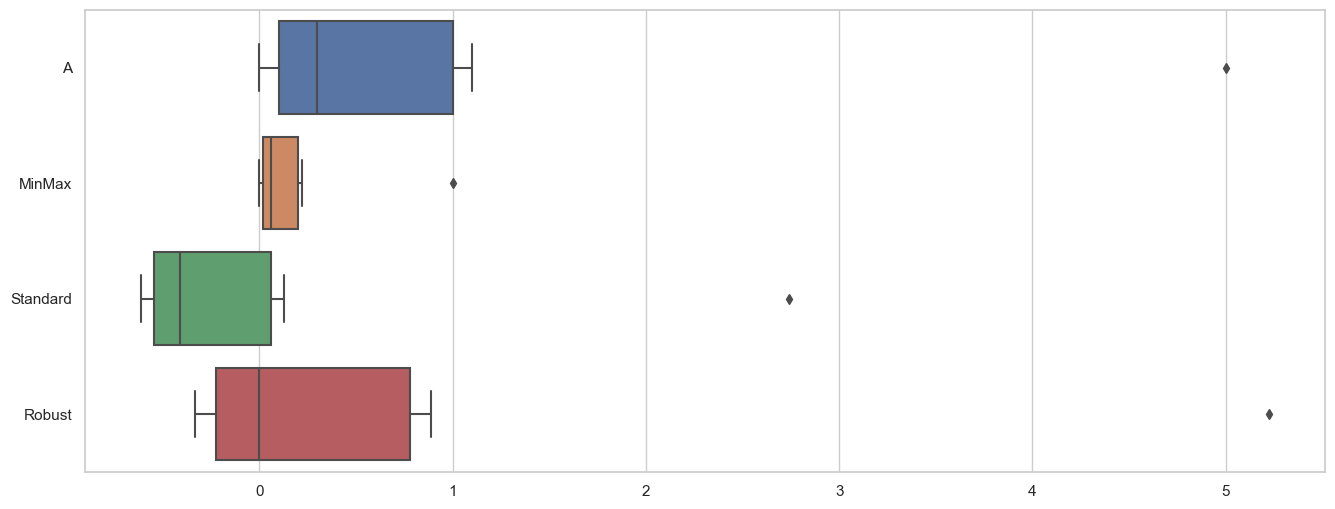

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

plt.figure(figsize=(16, 6))
sns.boxplot(data=df_scaler, orient='h');

* minmax, standard scaler는 outlier에 영향 많이 받음
* robust scaler: outlier에 영향 적게 받음